In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy.optimize import curve_fit
from scipy.stats import probplot,shapiro

In [2]:
chain_rg_ree=pd.read_csv('varying_chain_lengths_master_out_epas=0.1.csv')
chain_rg_ree['Rend2']=chain_rg_ree.Rendx+chain_rg_ree.Rendy+chain_rg_ree.Rendz
chain_rg_ree['Rg2']=chain_rg_ree.Rgx+chain_rg_ree.Rgy+chain_rg_ree.Rgz
chain_rg_ree['ratio']=chain_rg_ree.Rend2.values/chain_rg_ree.Rg2.values
chain_rg_ree=chain_rg_ree[chain_rg_ree.chain_length<=200]
chain_rg_ree['asphericity']=chain_rg_ree.Rgx.values-(0.5*(chain_rg_ree.Rgy.values+chain_rg_ree.Rgz.values))
chain_rg_ree['acylindricity']=chain_rg_ree.Rgy.values-chain_rg_ree.Rgz.values
chain_rg_ree['RSA']=((chain_rg_ree.asphericity.values**2+(0.75*chain_rg_ree.acylindricity.values**2))/(chain_rg_ree.Rg2.values)**2)**0.5


In [3]:
def cum_mean(arr):
    cum_sum = np.cumsum(arr, axis=0)    
    for i in range(cum_sum.shape[0]):       
        if i == 0:
            continue        
        cum_sum[i] =  cum_sum[i] / (i + 1)
    return cum_sum


In [4]:
def running_mse(arr):
    mse=[]
    for i in range(arr.shape[0]):
        if i==0:
            difference_array = np.subtract(arr[i+1], arr[0])
            squared_array = np.square(difference_array)
            mse.append(squared_array.mean())            
        else:
            difference_array = np.subtract(arr[i], arr[i-1])
            squared_array = np.square(difference_array)
            mse.append(squared_array.mean())
    return mse    

In [5]:
#measure lsx/Rg = 1.5Rg
#change to random walk, by something to do with beads

# check what the data look like. make sure the frames are equilibrated

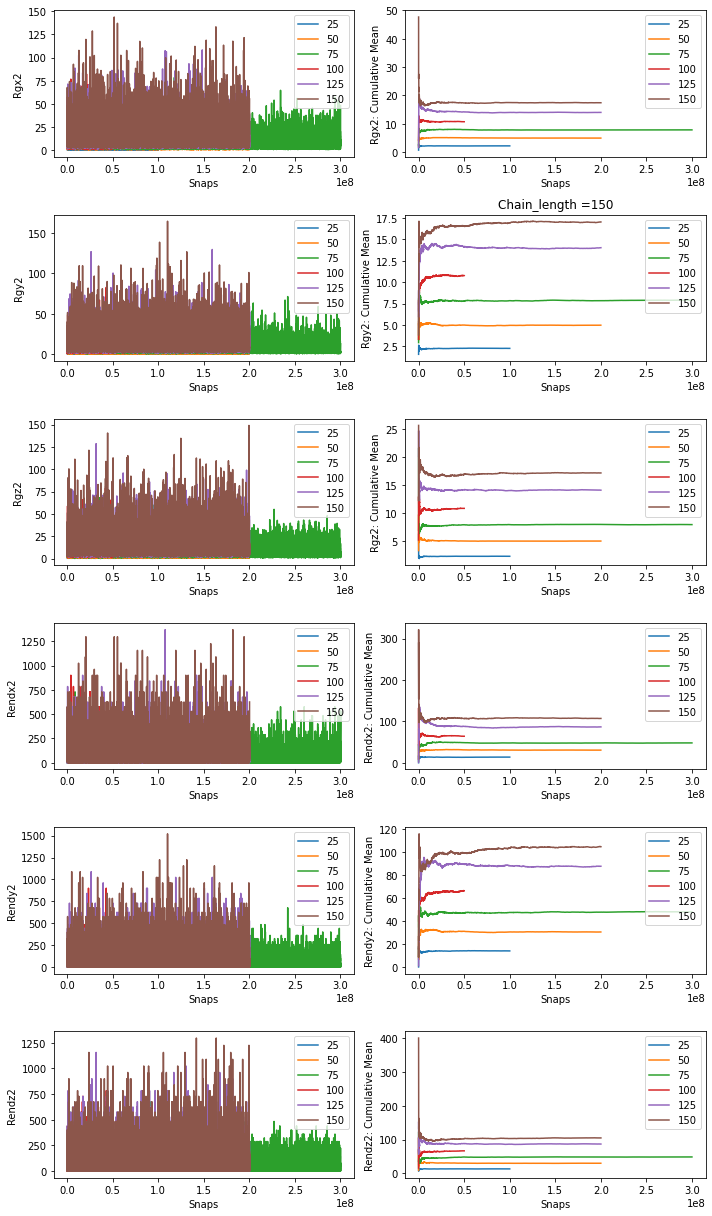

In [6]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10,17))

for chain_length in chain_rg_ree.chain_length.unique():
    ax[0,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values,label=str(chain_length))
    
    ax[0,0].set_ylabel('Rgx2')
    ax[0,0].set_xlabel('Snaps')
    ax[0,0].legend()
    ax[0,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values),label=str(chain_length))
    ax[0,1].set_xlabel('Snaps')
    ax[0,1].set_ylabel('Rgx2: Cumulative Mean')

    ax[0,1].legend()
    ax[1,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgy.values,label=str(chain_length))

    ax[1,0].set_ylabel('Rgy2')
    ax[1,0].set_xlabel('Snaps')
    ax[1,0].legend()    
    ax[1,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgy.values),label=str(chain_length))
    ax[1,1].set_xlabel('Snaps')
    ax[1,1].set_ylabel('Rgy2: Cumulative Mean')
    ax[1,1].legend()    
    ax[1,1].set_title('Chain_length ='+str(chain_length))

    ax[2,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgz.values,label=str(chain_length))
 
    ax[2,0].set_ylabel('Rgz2')
    ax[2,0].set_xlabel('Snaps')
    ax[2,0].legend()    
    ax[2,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgz.values),label=str(chain_length))
    ax[2,1].set_xlabel('Snaps')
    ax[2,1].set_ylabel('Rgz2: Cumulative Mean')
   
    ax[2,1].legend()
    ax[3,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendx.values,label=str(chain_length))
 
    ax[3,0].set_ylabel('Rendx2')
    ax[3,0].set_xlabel('Snaps')
    ax[3,0].legend()    
    ax[3,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendx.values),label=str(chain_length))
    ax[3,1].set_xlabel('Snaps')
    ax[3,1].set_ylabel('Rendx2: Cumulative Mean')
 
    ax[3,1].legend()

    ax[4,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendy.values,label=str(chain_length))
 
    ax[4,0].set_ylabel('Rendy2')
    ax[4,0].set_xlabel('Snaps')
    ax[4,0].legend()    
    ax[4,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendy.values),label=str(chain_length))
    ax[4,1].set_xlabel('Snaps')
    ax[4,1].set_ylabel('Rendy2: Cumulative Mean')
 
    ax[4,1].legend()

    ax[5,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendz.values,label=str(chain_length))
 
    ax[5,0].set_ylabel('Rendz2')
    ax[5,0].set_xlabel('Snaps')
    ax[5,0].legend()    
    ax[5,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendz.values),label=str(chain_length))
    ax[5,1].set_xlabel('Snaps')
    ax[5,1].set_ylabel('Rendz2: Cumulative Mean')

    ax[5,1].legend()    
plt.tight_layout()

In [7]:
# make sure to manually add ONLY the relevant/working chain length from chain_rg_ree in this below chain length list
chain_lengths_considered = [25,50,75,100,125,150]
blank_df = pd.DataFrame()
for chain_length in chain_rg_ree.chain_length.unique():
    if chain_length in chain_lengths_considered:
        frames_number=len(chain_rg_ree[chain_rg_ree.chain_length==chain_length].index)
        equil_frames=int(0.90*frames_number)
        temp_df = chain_rg_ree[chain_rg_ree.chain_length==chain_length].iloc[-equil_frames:,:]
        blank_df = blank_df.append(temp_df)
equil_chain_rg_ree=blank_df.copy()
del blank_df, temp_df

In [8]:
equil_chain_rg_ree[equil_chain_rg_ree.chain_length==100].Rg2.mean()

32.38313067198936

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


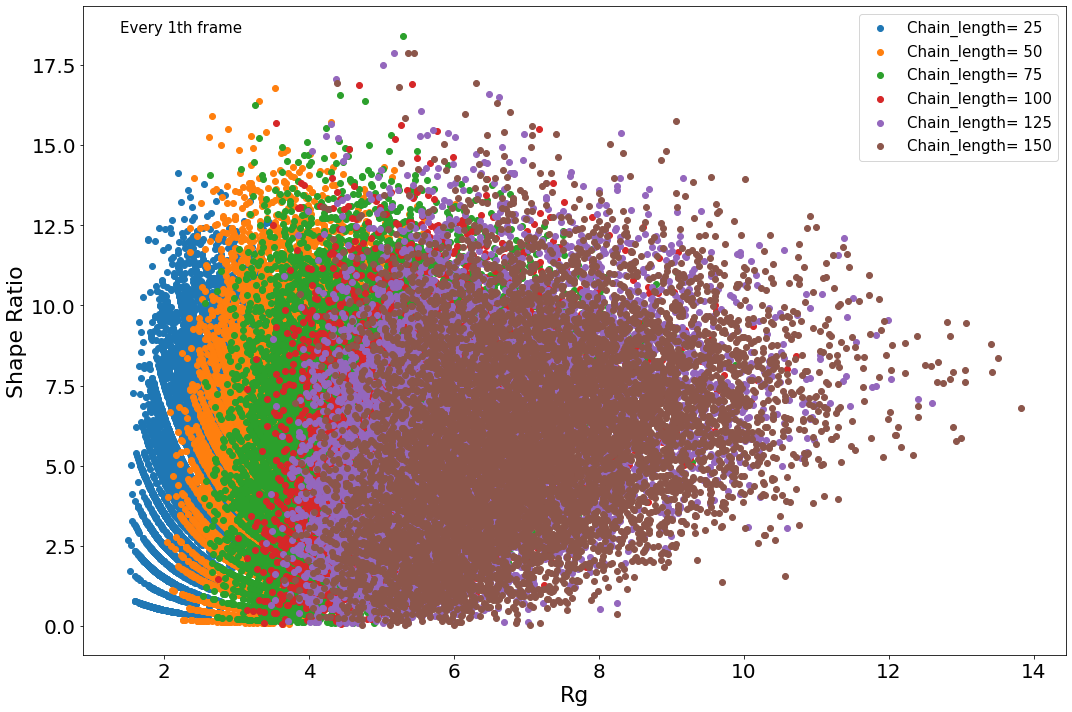

In [9]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values)**0.5,
               equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Rg',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


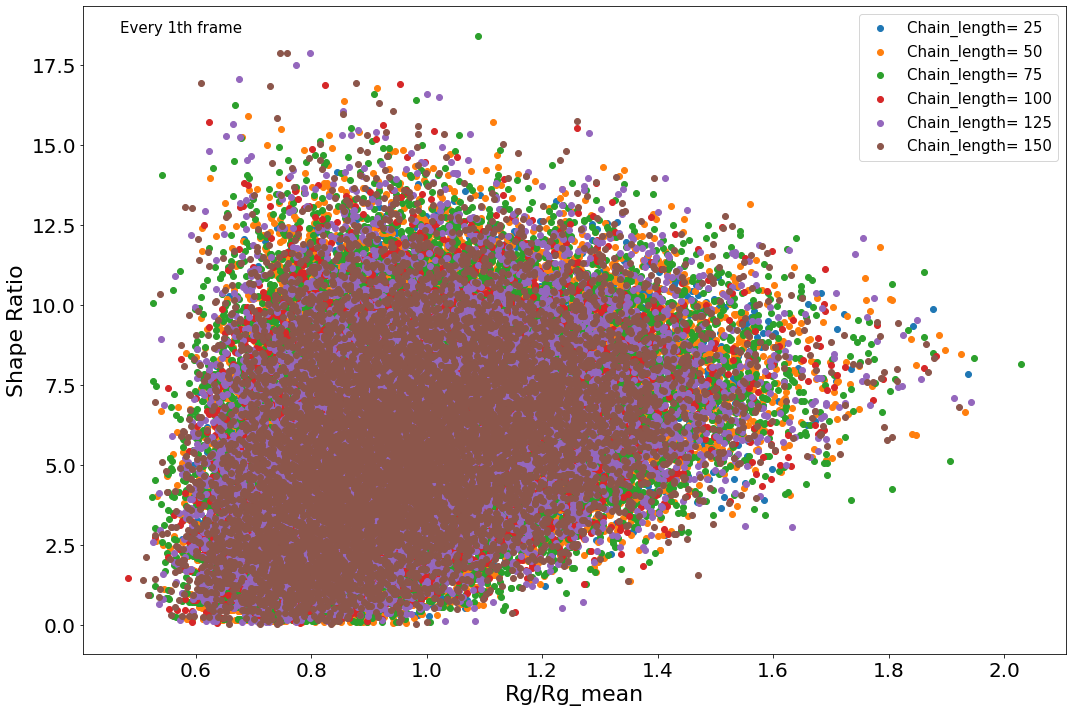

In [10]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values)**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5,
               equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Rg/Rg_mean',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # This is added back by InteractiveShellApp.init_path()


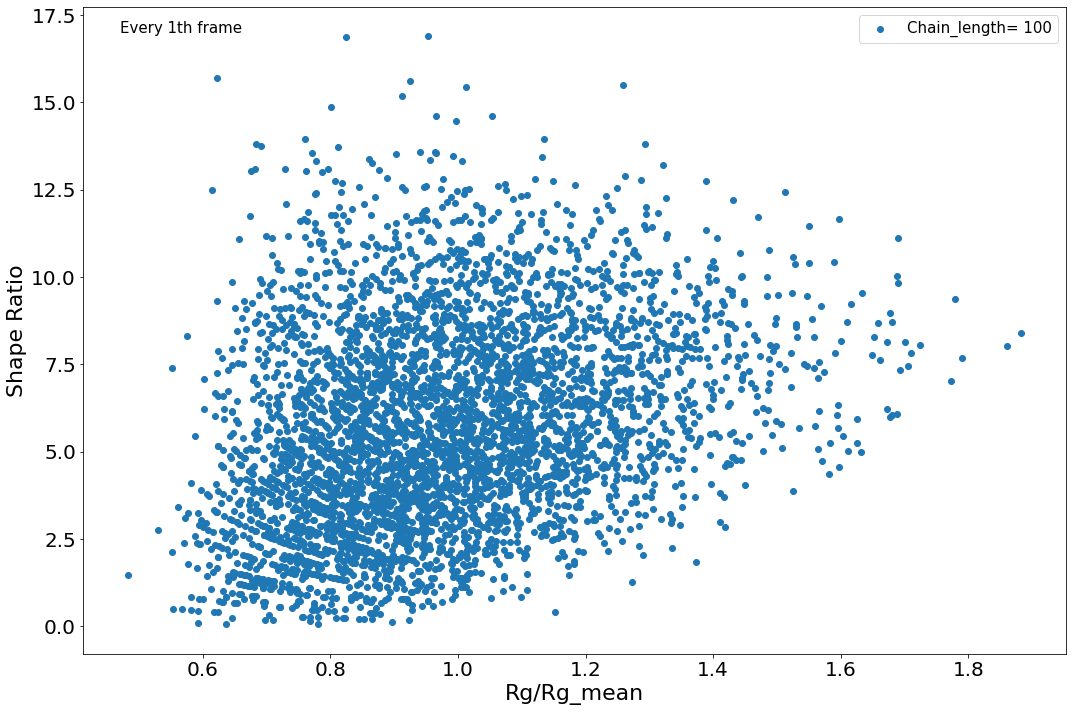

In [11]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    if i==100:
        ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values)**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5,
                   equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
                label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Rg/Rg_mean',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

mean=  0.38219429041918807 for run =  25 std=  0.17400012554067362 error =  0.0018332059922526712
mean=  0.3747589353286368 for run =  50 std=  0.17165511068776795 error =  0.001279121913427879
mean=  0.3733674638464292 for run =  75 std=  0.17316528338838588 error =  0.0012903752631631782
mean=  0.3732816356015386 for run =  100 std=  0.17132818186197263 error =  0.0025514595555988233
mean=  0.37279940509509824 for run =  125 std=  0.1712320105575232 error =  0.0018040420766601531
mean=  0.37492869067351164 for run =  150 std=  0.1725158701689924 error =  0.0018175683837570197


/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':


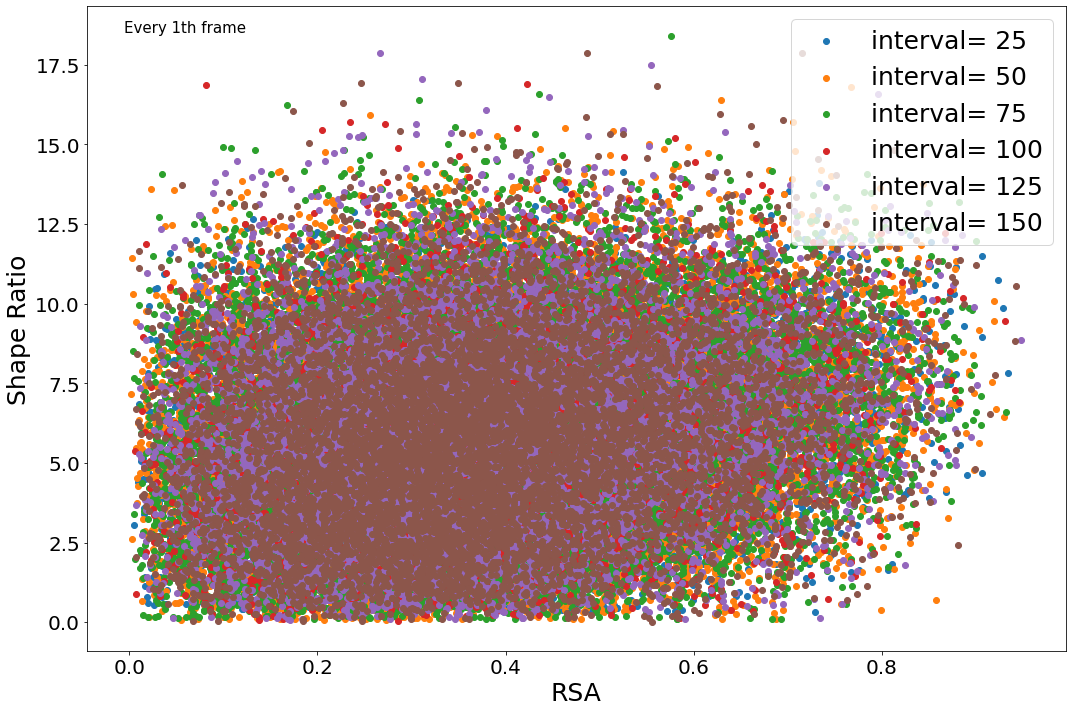

In [12]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].RSA.values,equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='interval= '+str(i))
    print('mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].RSA.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].RSA.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].RSA.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
ax.legend(fontsize=25,loc='upper right')
ax.set_xlabel('RSA',fontsize=25)
ax.set_ylabel('Shape Ratio',fontsize=25)
#ax.set_ylim(0,15)
#ax.set_xlim(0,1)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


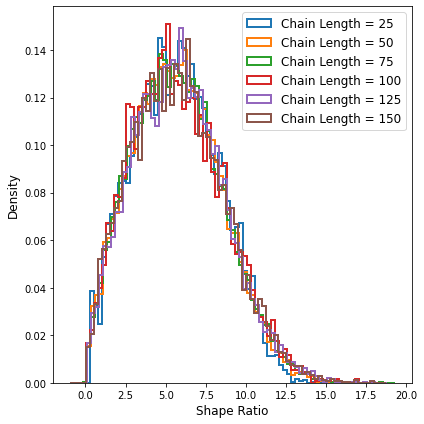

In [14]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    n,bins,patches=plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.min()-1,
                                        equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.max()+1,0.25),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Shape Ratio",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


In [15]:
for chain_length in equil_chain_rg_ree.chain_length.unique():
    print('The mean shape ratio for chain length ',str(chain_length),' is',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.mean(),'0.2f'),
         'with standard deviation ',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.std(),'0.2f'))
    

The mean shape ratio for chain length  25  is 5.68 with standard deviation  2.63
The mean shape ratio for chain length  50  is 5.71 with standard deviation  2.76
The mean shape ratio for chain length  75  is 5.73 with standard deviation  2.78
The mean shape ratio for chain length  100  is 5.75 with standard deviation  2.84
The mean shape ratio for chain length  125  is 5.81 with standard deviation  2.83
The mean shape ratio for chain length  150  is 5.78 with standard deviation  2.88


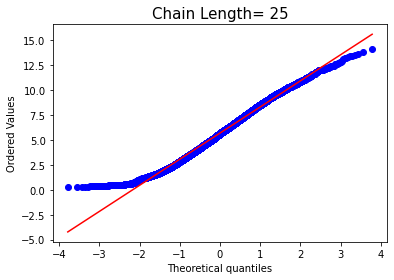

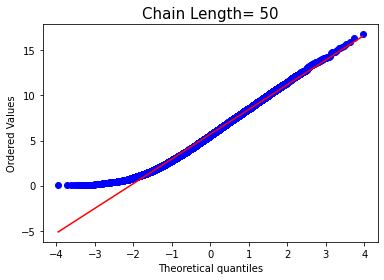

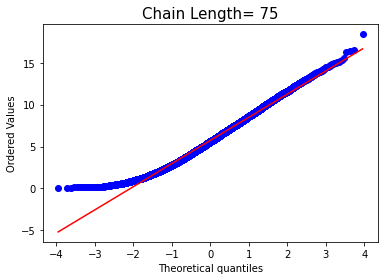

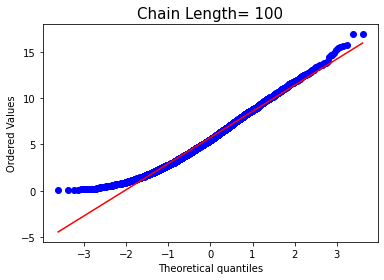

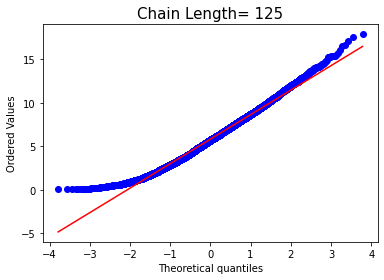

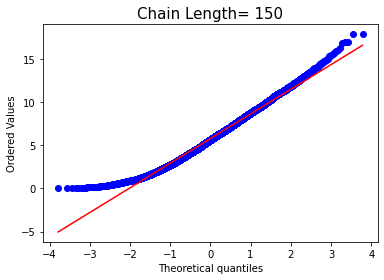

In [16]:
#Q-Q plot
#Shape Ratio
for i in equil_chain_rg_ree.chain_length.unique():
    probplot(x=equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio,dist='norm',plot=plt)
    plt.title('Chain Length= '+str(i),fontsize=15)
    plt.show()


/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/too

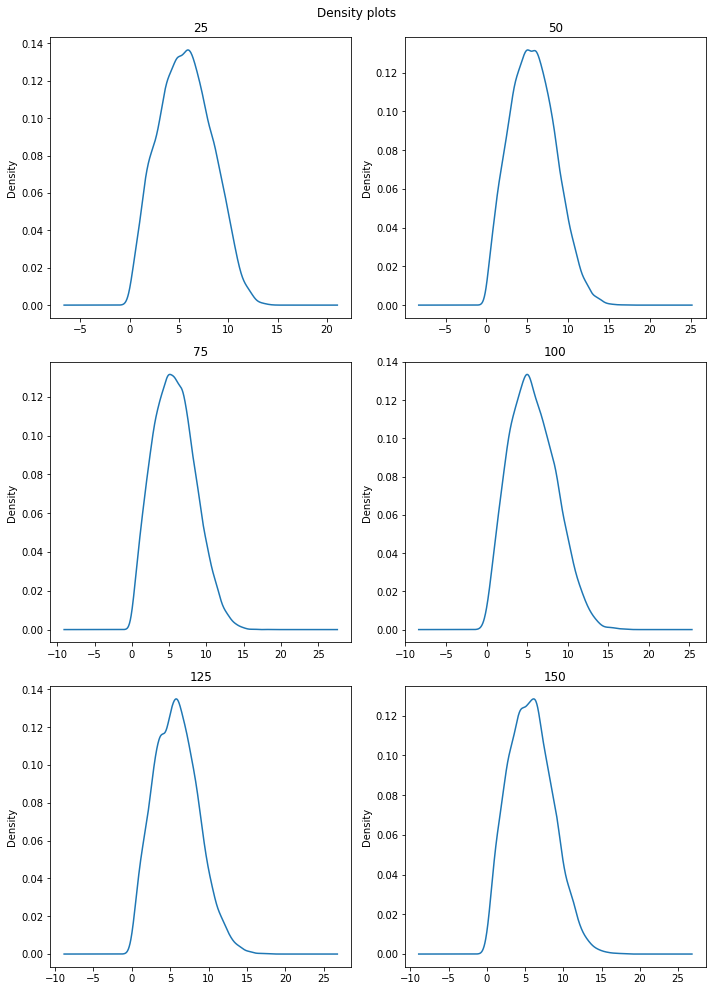

In [17]:
#Density plot
fig,ax = plt.subplots(3,2,figsize=(10,14))
row = col = 0
for n,c in enumerate(equil_chain_rg_ree.chain_length.unique()):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    equil_chain_rg_ree[equil_chain_rg_ree.chain_length==c].ratio.plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(c)
    col += 1
plt.suptitle("Density plots")
plt.tight_layout()

In [18]:
for i in equil_chain_rg_ree.chain_length.unique():
    print(f'{i}: {"Not Gaussian" if shapiro(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio)[1]<0.05 else "Gaussian"}  {shapiro(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio)}')


25: Not Gaussian  (0.9897186756134033, 5.078058377317092e-25)
50: Not Gaussian  (0.9894502758979797, 4.265300996590344e-34)
75: Not Gaussian  (0.9880513548851013, 6.501263644299779e-36)
100: Not Gaussian  (0.9852035045623779, 2.420207889656375e-21)
125: Not Gaussian  (0.9879212379455566, 5.3784093554081376e-27)
150: Not Gaussian  (0.9863477945327759, 1.500599390266495e-28)


/public/apps/python/3.7.0/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/public/apps/python/3.7.0/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/public/apps/python/3.7.0/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/public/apps/python/3.7.0/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/public/apps/python/3.7.0/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 500

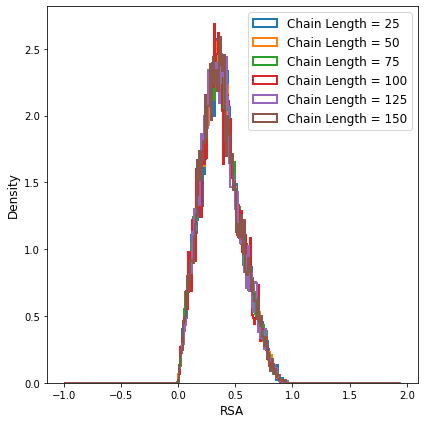

In [19]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    n,bins,patches=plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.min()-1,
                                        equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.max()+1,0.01),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('RSA distribution',fontsize=25)
plt.xlabel("RSA",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


In [20]:
for chain_length in equil_chain_rg_ree.chain_length.unique():
    print('The mean RSA for chain length ',str(chain_length),' is',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.mean(),'0.2f'),
         'with standard deviation ',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.std(),'0.2f'))
    

The mean RSA for chain length  25  is 0.38 with standard deviation  0.17
The mean RSA for chain length  50  is 0.37 with standard deviation  0.17
The mean RSA for chain length  75  is 0.37 with standard deviation  0.17
The mean RSA for chain length  100  is 0.37 with standard deviation  0.17
The mean RSA for chain length  125  is 0.37 with standard deviation  0.17
The mean RSA for chain length  150  is 0.37 with standard deviation  0.17


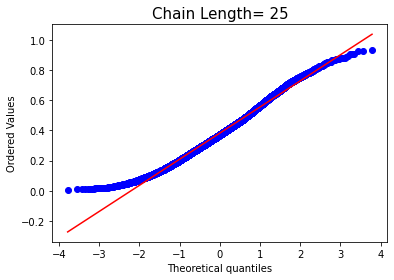

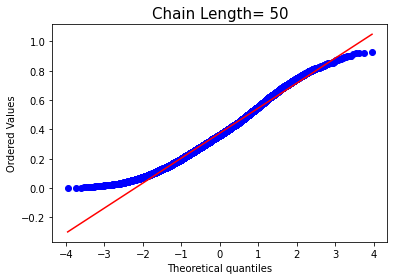

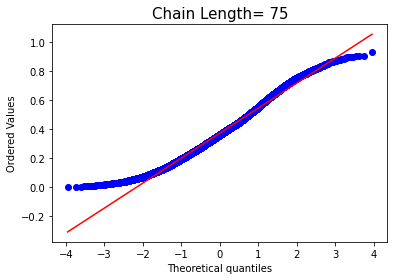

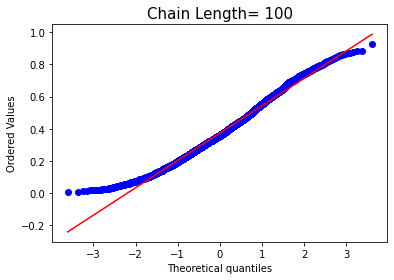

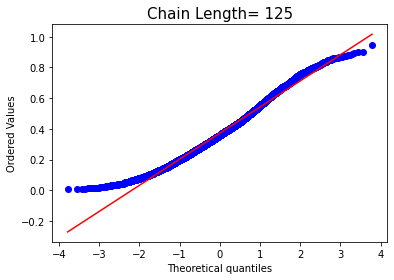

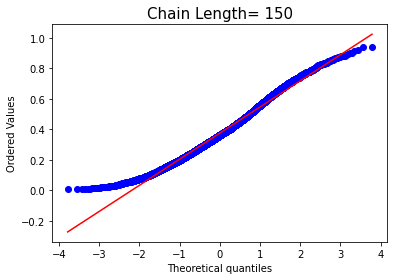

In [21]:
#Q-Q plot
#RSA
for i in equil_chain_rg_ree.chain_length.unique():
    probplot(x=equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].RSA,dist='norm',plot=plt)
    plt.title('Chain Length= '+str(i),fontsize=15)
    plt.show()


/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/too

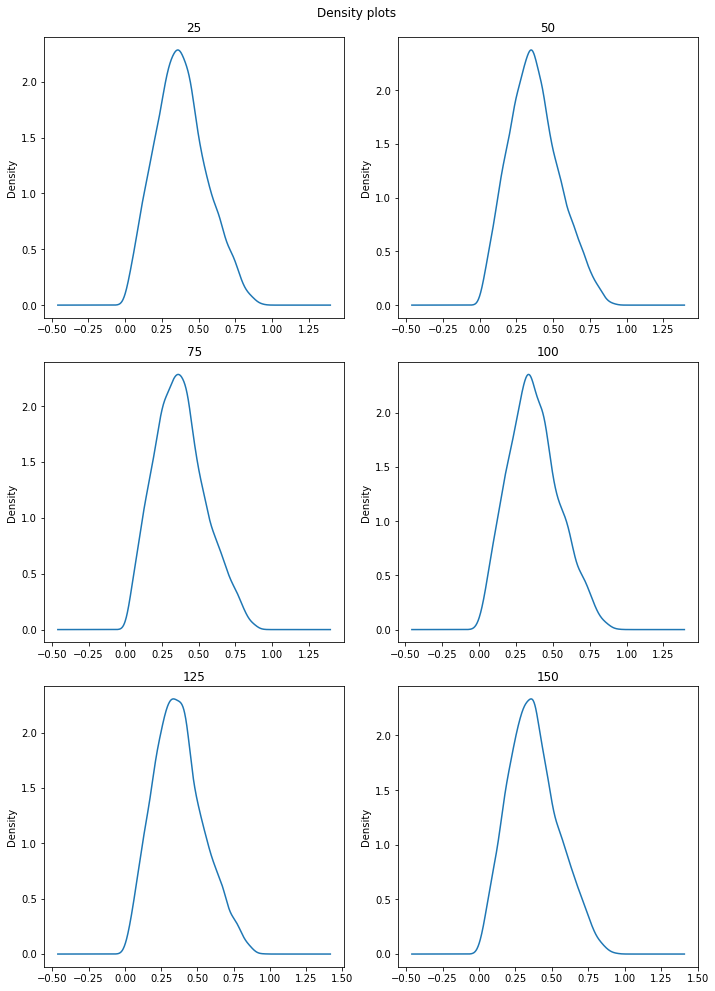

In [22]:
#Density plot
fig,ax = plt.subplots(3,2,figsize=(10,14))
row = col = 0
for n,c in enumerate(equil_chain_rg_ree.chain_length.unique()):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    equil_chain_rg_ree[equil_chain_rg_ree.chain_length==c].RSA.plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(c)
    col += 1
plt.suptitle("Density plots")
plt.tight_layout()

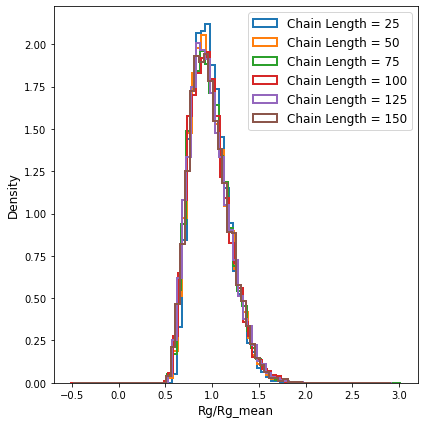

In [23]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean())**0.5,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,linewidth=2,bins=np.arange(((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5)/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean()**0.5)).min()-1,
                                        ((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5)/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean()**0.5)).max()+1,0.05))
    
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Rg/Rg_mean",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


AttributeError: 'float' object has no attribute 'mean'

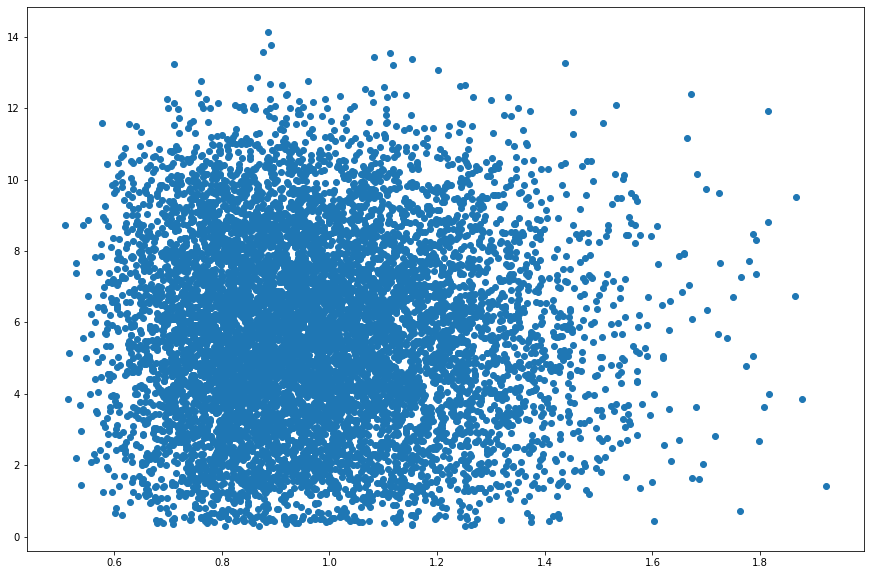

In [24]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean())**0.5,equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='interval= '+str(i))
    print('mean Rg/Rg_mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean())**0.5.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.std())**0.5)
ax.legend(fontsize=25,loc='upper right')
ax.set_xlabel('RSA',fontsize=25)
ax.set_ylabel('Shape Ratio',fontsize=25)
#ax.set_ylim(0,15)
#ax.set_xlim(0,1)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


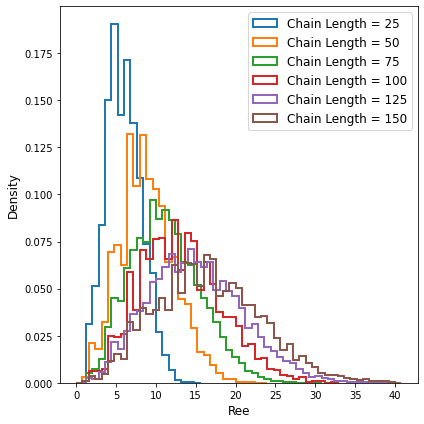

In [25]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5).min()-1,
                                        (equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5).max()+1,0.8),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Ree",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


# no need beyond this point

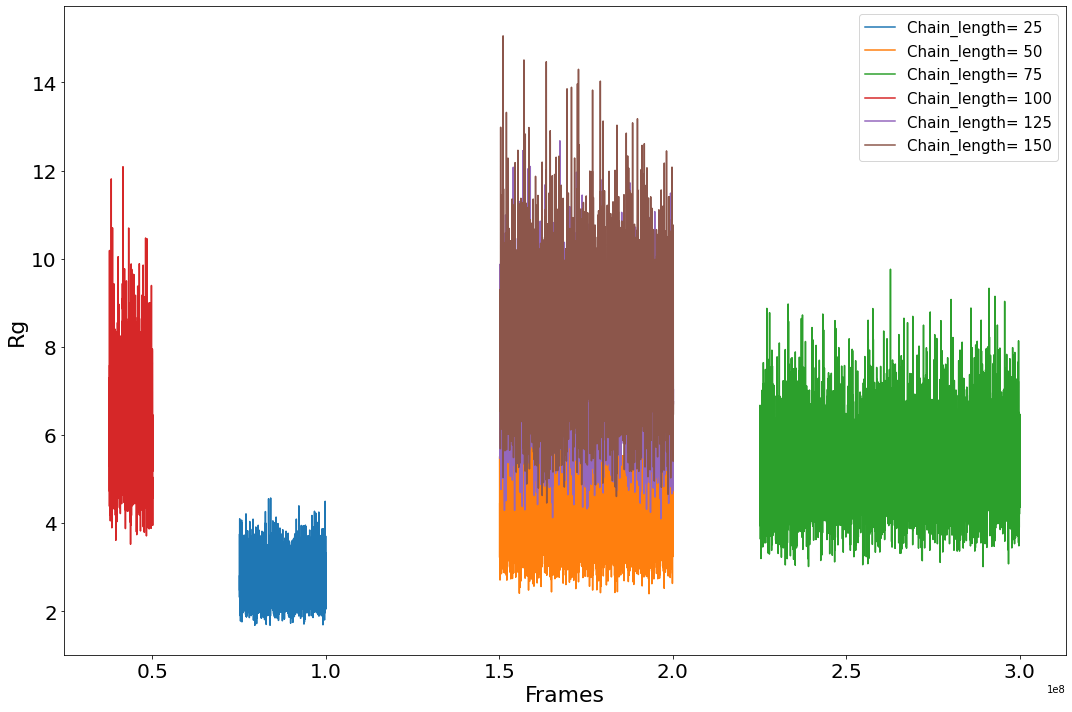

In [90]:
fig,ax = plt.subplots(figsize=(15,10))
for i in equil_chain_rg_ree.chain_length.unique():
    ax.plot(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].frames.values,(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.values)**0.5,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Frames',fontsize=22)
ax.set_ylabel('Rg',fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

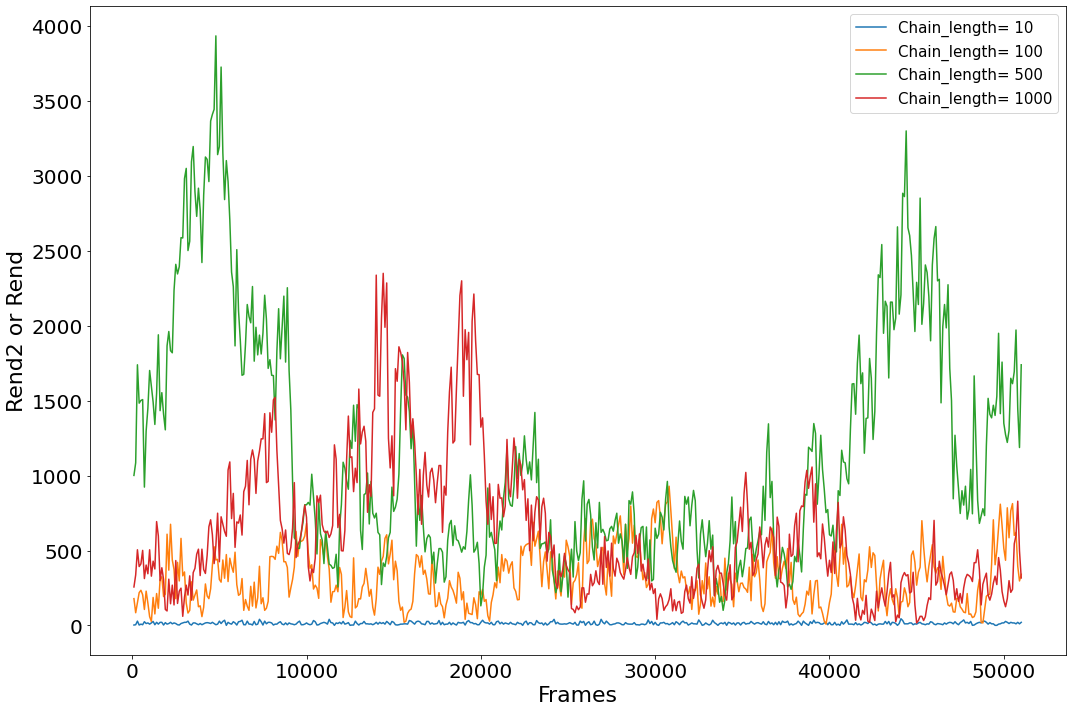

In [10]:
fig,ax = plt.subplots(figsize=(15,10))
for i in chain_rg_ree.chain_length.unique():
    ax.plot(chain_rg_ree[chain_rg_ree.chain_length==i].frames.values,chain_rg_ree[chain_rg_ree.chain_length==i].Rend2.values,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Frames',fontsize=22)
ax.set_ylabel('Rend2 or Rend',fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

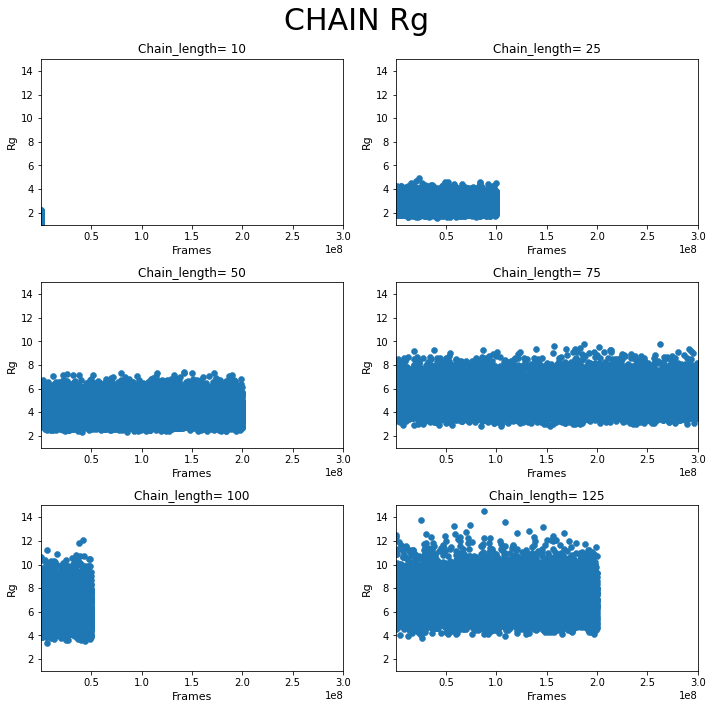

In [94]:
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(10,10))
counter=0
states=chain_rg_ree.chain_length.unique()
for x_dim in range(1,axs.shape[0]+1):
    for y_dim in range(1,axs.shape[1]+1):
        if counter<len(states):
            axs[x_dim-1,y_dim-1].scatter(chain_rg_ree[chain_rg_ree.chain_length==states[counter]].frames.values,
                                         (chain_rg_ree[chain_rg_ree.chain_length==states[counter]].Rg2.values)**0.5,
                                      linewidth=0.5)
            axs[x_dim-1,y_dim-1].set_title('Chain_length= '+str(states[counter]),fontsize=12)
            axs[x_dim-1,y_dim-1].set_ylabel('Rg',fontsize=11)
            axs[x_dim-1,y_dim-1].set_xlabel('Frames',fontsize=11)
            axs[x_dim-1,y_dim-1].set_xlim(int(chain_rg_ree.frames.values.min()),int(chain_rg_ree.frames.values.max()))
            axs[x_dim-1,y_dim-1].set_ylim(int(chain_rg_ree.Rg2.values.min()**0.5),int(chain_rg_ree.Rg2.values.max()**0.5))
        counter+=1
fig.suptitle('CHAIN Rg',fontsize=30)
plt.tight_layout()


CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.39 µs


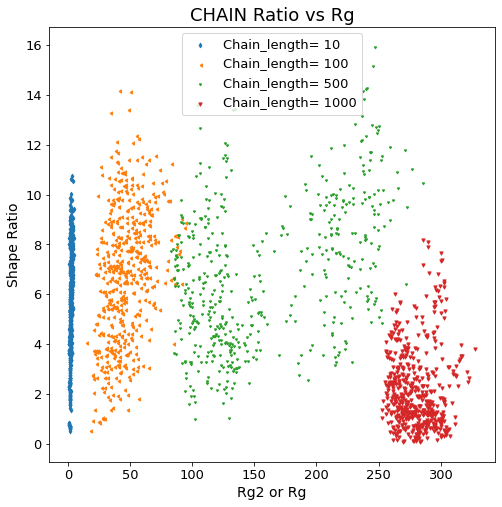

In [21]:
#IGNORE
%time
%matplotlib inline
plt.rcParams["font.weight"] = "regular"
plt.rcParams["axes.labelweight"] = "regular"
fig,ax = plt.subplots(figsize=(8,8))
temp_chain= chain_rg_ree.copy()
scatter_markers=['d',4,'1','v']
j=0
for chain_length in temp_chain.chain_length.unique():
    ax.scatter(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rg2.values,
               chain_rg_ree[chain_rg_ree.chain_length==chain_length].ratio.values,
               marker=scatter_markers[j],s=10,alpha=1,
                                      label='Chain_length= '+str(chain_length))
    j+=1
ax.set_xlabel('Rg2 or Rg',fontsize=14)
ax.set_ylabel('Shape Ratio',fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=13)
plt.setp(ax.get_xticklabels(), fontsize=13)
ax.legend(fontsize=13)
ax.set_title('CHAIN Ratio vs Rg',fontsize=18) #Ratio vs Rg
del temp_chain